In [6]:
from processing import msevn
import os
import numpy as np
import scipy

#msevn.configure_mpl()

In [2]:
normal_distr = scipy.stats.norm(loc=83, scale=11)

get_rel_amp = lambda x: normal_distr.pdf(x) / normal_distr.pdf(83)

In [8]:
import re

root = './matlab/output/noscaled'
#fname = 'cylinder_15edge_249gap_50radius_0.0nonreg_1.8702m_15deg_TEpol_83wav_800bw.mat'


dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 25)
dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = filter(lambda x: x.endswith('.mat'), os.listdir(root))
files = filter(lambda x: re.search('15deg', x), files)

eint_storage = {}

#eint0_90_global = np.load('shet.npy')

for fname in files:

    wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())

    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, fname),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(15, 166, 20)
        )

    eint0_90_global += get_rel_amp(wavelength) * eint0_90
    eint_storage[wavelength] = get_rel_amp(wavelength) * eint0_90

    # eint90_180 = msevn.mstm_est.e_int(
    #         matpath=os.path.join(root, fname),
    #         dphi=dphi,
    #         dtheta=dtheta90_180,
    #         thickness=msevn.mstm_est.thickness(15, 249, 50)
    #    )

    # eint90_180_global += get_rel_amp(wavelength) * eint90_180

 93%|█████████▎| 28/30 [04:59<00:22, 11.11s/it]

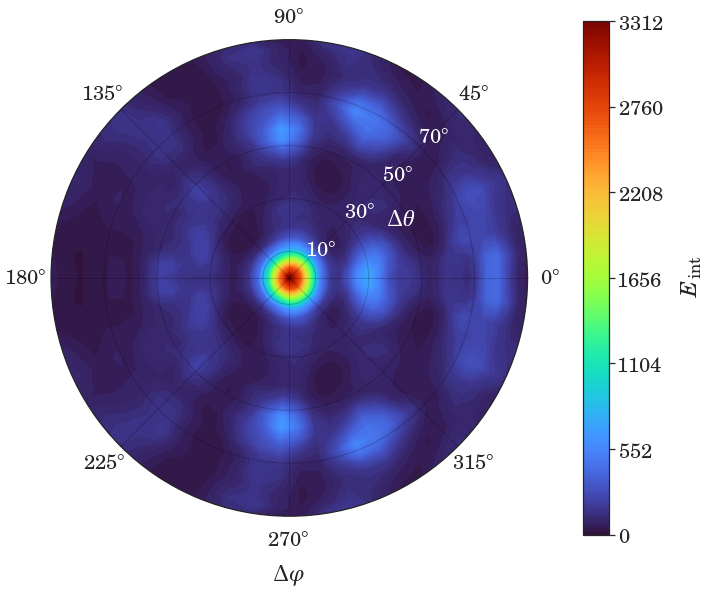

In [7]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[83], kind='t', dtheta=dtheta0_90, dphi=dphi)
#fig.savefig(f'../tex/components/img/celes/e_int_wavepacket8..12_rad_20nm_20deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


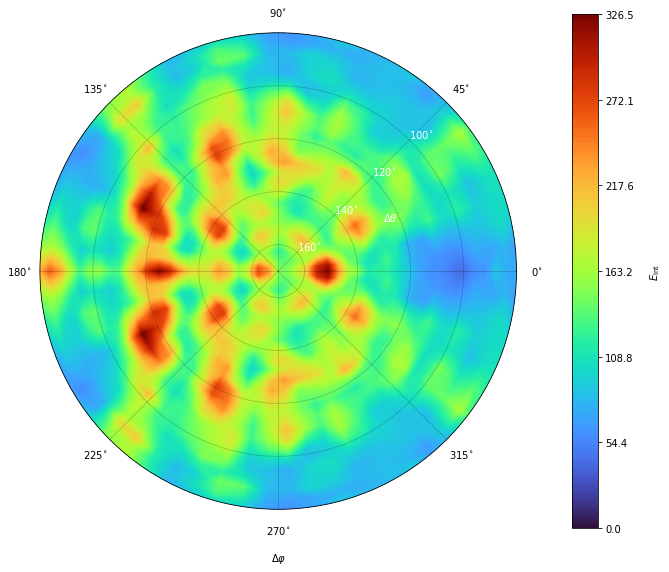

In [6]:
fig = msevn.mstm_polar_plot.e_int(eint90_180_global, kind='r', dtheta=dtheta90_180, dphi=dphi)
#fig.savefig(f'../tex/components/img/celes/e_int_cylinder_15edge_theta0_15_phi0_0_249gap_rad50nm_refr.pdf', bbox_inches='tight')